<a href="https://colab.research.google.com/github/Haniya16/GlobalMart_Sales_EDA-using-ML./blob/main/Exploratory_Data_Analysis_(EDA)_%E2%80%94_GlobalMart_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Visual Creator
Task 1: Crafting the First Cut (Basic Editing Workflow).

Focus: Data cleaning, analysis, and visualization

Dataset: globalmart_sales.csv

Expected Output: Cleaned data, visualizations, and insights

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from io import StringIO
import datetime, textwrap

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load & Inspect Data

In [2]:
# Load & Inspect Data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Visual Creator/supermarket_sales.csv")

print("First 5 Rows of Dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


First 5 Rows of Dataset:


,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
0,4971,2021-01-01,North,USA,David Lee,Team C,C3971,Corporate,Furniture,Office Chair,Won,6,1662,1447,1665
1,2347,2021-01-02,South,Brazil,Alice Johnson,Team B,C1347,SME,Appliances,Microwave Max,Opportunity,2,464,875,928
2,2588,2021-01-02,South,Brazil,Maria Garcia,Team C,C1588,Retail,Appliances,Refrigerator,Opportunity,5,132,277,264
3,5092,2021-01-02,East,China,Priya Sharma,Team B,C4092,Retail,Appliances,Microwave Max,Opportunity,5,610,1080,1220
4,1182,2021-01-02,North,Canada,David Lee,Team A,C0182,Retail,Electronics,Smartphone Z,Lost,0,0,854,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          5000 non-null   int64 
 1   Order_Date        5000 non-null   object
 2   Region            5000 non-null   object
 3   Country           5000 non-null   object
 4   Sales_Rep         5000 non-null   object
 5   Team              5000 non-null   object
 6   Customer_ID       5000 non-null   object
 7   Customer_Segment  5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Product_Name      5000 non-null   object
 10  Stage             5000 non-null   object
 11  Units_Sold        5000 non-null   int64 
 12  Revenue           5000 non-null   int64 
 13  Target            5000 non-null   int64 
 14  Deal_Size         5000 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 586.1+ KB

Summary Statistics:


,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
count,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000
unique,NaN,1419,4,8,6,3,5000,3,3,8,3,NaN,NaN,NaN,NaN
top,NaN,2022-04-13,North,Canada,Alice Johnson,Team C,C3221,Corporate,Appliances,Standing Desk,Lost,NaN,NaN,NaN,NaN
freq,NaN,10,1323,668,861,1758,1,1675,1709,860,1707,NaN,NaN,NaN,NaN
mean,3500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.818400,502.390000,994.572000,639.007800
std,1443.520003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.922453,555.072392,556.665335,598.863616
min,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-193.000000,0.000000
25%,2250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,567.000000,0.000000
50%,3500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,347.500000,914.000000,556.000000
75%,4750.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,728.000000,1427.000000,1129.000000



Missing Values:
Order_ID            0
Order_Date          0
Region              0
Country             0
Sales_Rep           0
Team                0
Customer_ID         0
Customer_Segment    0
Product_Category    0
Product_Name        0
Stage               0
Units_Sold          0
Revenue             0
Target              0
Deal_Size           0
dtype: int64

Duplicate Rows: 0


# Data Cleaning

In [3]:
# Data Cleaning
print("\nCleaning the Data")

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Handle missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\nData Cleaning Done")
print(df.isnull().sum())


Cleaning the Data

Data Cleaning Done
order_id            0
order_date          0
region              0
country             0
sales_rep           0
team                0
customer_id         0
customer_segment    0
product_category    0
product_name        0
stage               0
units_sold          0
revenue             0
target              0
deal_size           0
dtype: int64


# Analyze & Visualize


Analyzing and Visualizing the Data...


/tmp/ipython-input-2797103655.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


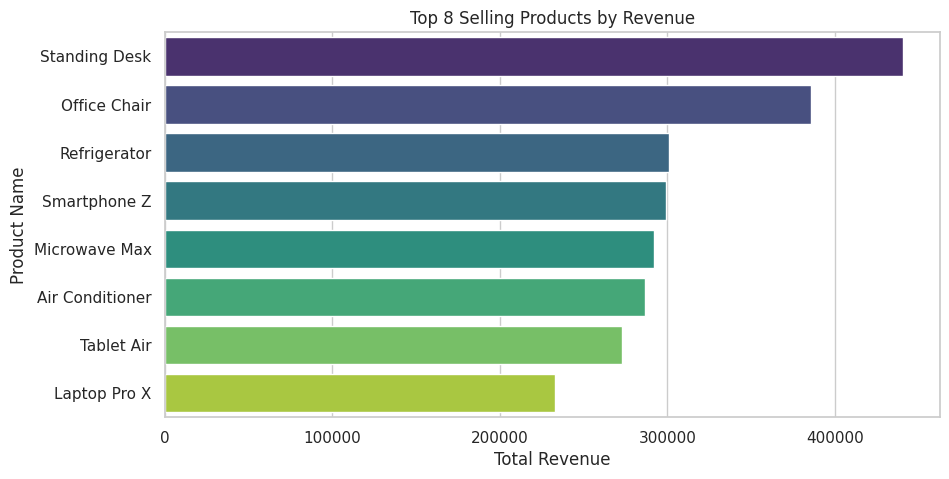

/tmp/ipython-input-2797103655.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette="mako")


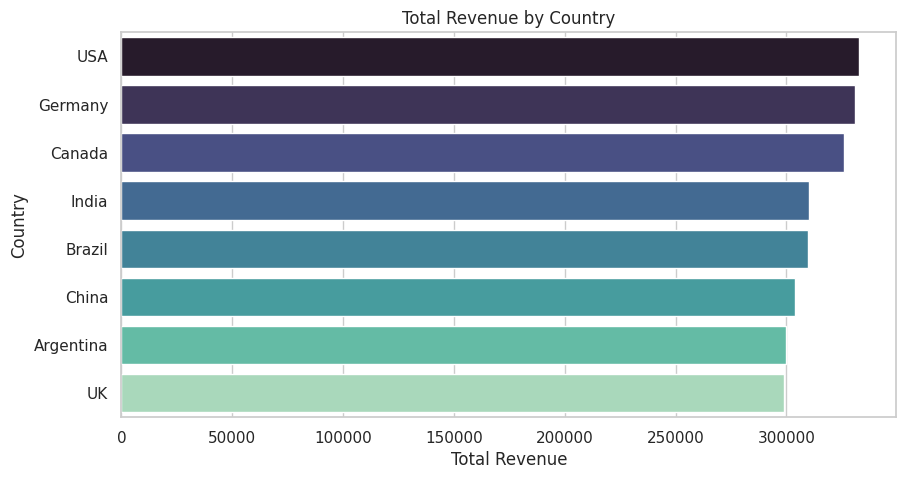

/tmp/ipython-input-2797103655.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_segment', data=df, palette="pastel")


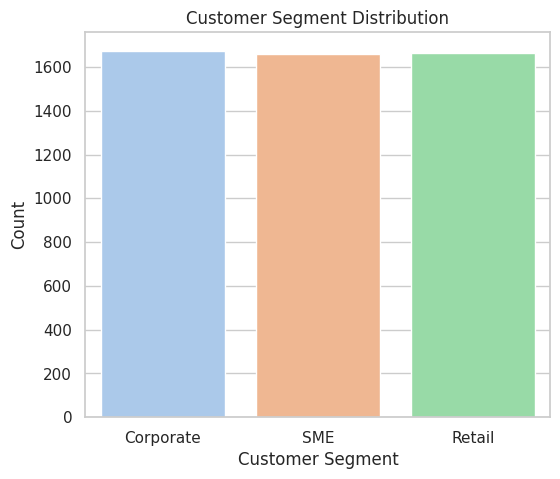

/tmp/ipython-input-2797103655.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_rep_sales.values, y=sales_rep_sales.index, palette="coolwarm")


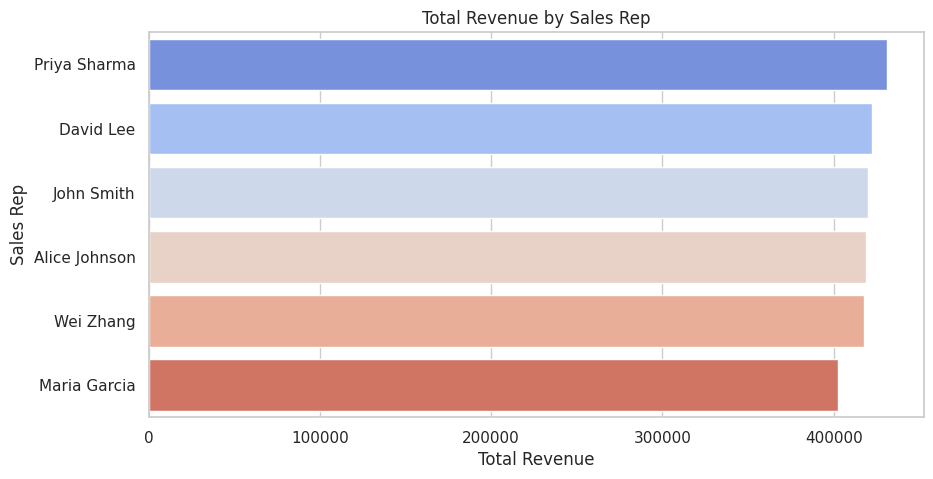

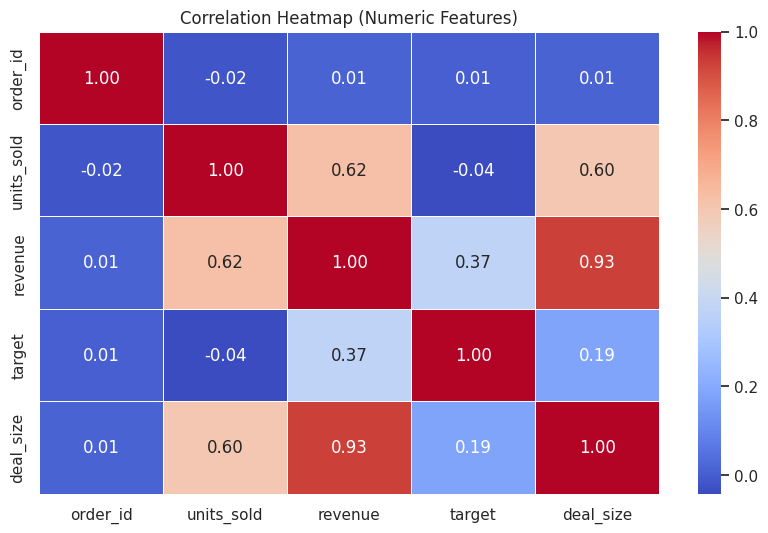

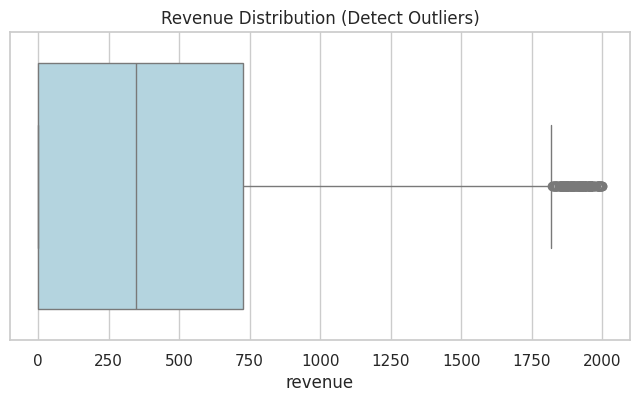


✅ Graphs PDF Created: GlobalMart_Sales_Graphs.pdf


In [4]:
#Analyze & Visualize (Graphs Only)

print("\nAnalyzing and Visualizing the Data...")

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Save only graph PDF
pdf_graphs = PdfPages("/content/drive/MyDrive/Colab Notebooks/Visual Creator/GlobalMart_Sales_Graphs.pdf")

# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Top-Selling Products
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 8 Selling Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
pdf_graphs.savefig()
plt.show()

# Sales by Country
country_sales = df.groupby('country')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=country_sales.values, y=country_sales.index, palette="mako")
plt.title("Total Revenue by Country")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
pdf_graphs.savefig()
plt.show()

# Customer Segment Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='customer_segment', data=df, palette="pastel")
plt.title("Customer Segment Distribution")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
pdf_graphs.savefig()
plt.show()

# Sales by Sales Rep
sales_rep_sales = df.groupby('sales_rep')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_rep_sales.values, y=sales_rep_sales.index, palette="coolwarm")
plt.title("Total Revenue by Sales Rep")
plt.xlabel("Total Revenue")
plt.ylabel("Sales Rep")
pdf_graphs.savefig()
plt.show()

# Correlation Heatmap (numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap (Numeric Features)")
    pdf_graphs.savefig()
    plt.show()

# Boxplot for Outliers in Revenue
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['revenue'], color="lightblue")
plt.title("Revenue Distribution (Detect Outliers)")
pdf_graphs.savefig()
plt.show()

pdf_graphs.close()
print("\n✅ Graphs PDF Created: GlobalMart_Sales_Graphs.pdf")


# Insights Summary

In [5]:
# Generate Detailed Insights Summary PDF

print("\nGenerating Detailed Insights Summary...")

# Create a text buffer for the summary
summary = StringIO()

summary.write("GLOBALMART SALES ANALYSIS - INSIGHTS SUMMARY\n")
summary.write("="*66 + "\n\n")
summary.write(f"Date Generated: {datetime.date.today()}\n\n")

# General Info
summary.write("General Dataset Overview:\n")
summary.write(f"Total Records: {len(df)}\n")
summary.write(f"Total Columns: {len(df.columns)}\n\n")

# Sales Insights
if 'revenue' in df.columns:
    total_rev = df['revenue'].sum()
    avg_rev = df['revenue'].mean()
    max_rev = df['revenue'].max()
    min_rev = df['revenue'].min()
    summary.write("Sales & Revenue Insights:\n")
    summary.write(f" - Total Revenue: {total_rev:,.2f}\n")
    summary.write(f" - Average Revenue per Transaction: {avg_rev:,.2f}\n")
    summary.write(f" - Highest Transaction Revenue: {max_rev:,.2f}\n")
    summary.write(f" - Lowest Transaction Revenue: {min_rev:,.2f}\n\n")

# Product Insights
if 'product_name' in df.columns:
    top_product = df.groupby('product_name')['revenue'].sum().idxmax()
    summary.write("Product Insights:\n")
    summary.write(f" - Unique Products: {df['product_name'].nunique()}\n")
    summary.write(f" - Best-Selling Product: {top_product}\n")
    summary.write(f" - Top 5 Product Lines: {', '.join(df['product_name'].value_counts().head(5).index)}\n\n")

# Geographical Insights
if 'country' in df.columns:
    top_country = df.groupby('country')['revenue'].sum().idxmax()
    summary.write("Geographical Insights:\n")
    summary.write(f" - Total Countries: {df['country'].nunique()}\n")
    summary.write(f" - Highest Sales Country: {top_country}\n\n")

# Customer Insights
if 'customer_segment' in df.columns:
    seg_counts = df['customer_segment'].value_counts()
    summary.write("Customer Segment Insights:\n")
    summary.write(str(seg_counts))
    summary.write(f"\n - Dominant Segment: {seg_counts.idxmax()}\n\n")

# Sales Rep Insights
if 'sales_rep' in df.columns:
    top_rep = df.groupby('sales_rep')['revenue'].sum().idxmax()
    summary.write("Sales Representative Insights:\n")
    summary.write(f" - Total Sales Representatives: {df['sales_rep'].nunique()}\n")
    summary.write(f" - Top Performing Sales Rep: {top_rep}\n\n")

# Correlation Insights
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    corr = numeric_df.corr()['revenue'].sort_values(ascending=False)
    summary.write("Correlation Insights:\n")
    summary.write("Top 5 Features Correlated with Revenue:\n")
    summary.write(str(corr.head(5)))
    summary.write("\n\n")

# Final Observations
summary.write("Overall Observations:\n")
summary.write("""- Top products and countries show strong market focus.
- Customer segments guide targeted marketing.
- Revenue correlates with quantity and unit price.
- Few outliers detected → stable performance.
- Healthy growth potential with top-performing sales reps.\n""")

# Print summary in Colab output
print(summary.getvalue())

# Save summary to PDF
pdf_summary = PdfPages("/content/drive/MyDrive/Colab Notebooks/Visual Creator/GlobalMart_Summary.pdf")

from textwrap import wrap

# Convert summary text to wrapped format
wrapped_text = "\n".join(wrap(summary.getvalue(), width=95))

# Create a proper PDF page
plt.figure(figsize=(8.5, 11))
plt.axis('off')
plt.text(0.05, 0.95, wrapped_text, fontsize=11, va='top', family='monospace')
pdf_summary.savefig()
plt.close()

print("\nInsight Summary PDF Created: GlobalMart_Summary.pdf")


Generating Detailed Insights Summary...
GLOBALMART SALES ANALYSIS - INSIGHTS SUMMARY

Date Generated: 2025-11-01

General Dataset Overview:
Total Records: 5000
Total Columns: 15

Sales & Revenue Insights:
 - Total Revenue: 2,511,950.00
 - Average Revenue per Transaction: 502.39
 - Highest Transaction Revenue: 1,999.00
 - Lowest Transaction Revenue: 0.00

Product Insights:
 - Unique Products: 8
 - Best-Selling Product: Standing Desk
 - Top 5 Product Lines: Standing Desk, Office Chair, Smartphone Z, Microwave Max, Refrigerator

Geographical Insights:
 - Total Countries: 8
 - Highest Sales Country: USA

Customer Segment Insights:
customer_segment
Corporate    1675
Retail       1666
SME          1659
Name: count, dtype: int64
 - Dominant Segment: Corporate

Sales Representative Insights:
 - Total Sales Representatives: 6
 - Top Performing Sales Rep: Priya Sharma

Correlation Insights:
Top 5 Features Correlated with Revenue:
revenue       1.000000
deal_size     0.928194
units_sold    0.624

# Save Cleaned Dataset

In [6]:
# Save Cleaned Dataset

df.to_csv("/content/drive/MyDrive/Colab Notebooks/Visual Creator/supermarket_sales_cleaned.csv", index=False)
print("Cleaned Dataset Saved as 'supermarket_sales_cleaned.csv'")

Cleaned Dataset Saved as 'supermarket_sales_cleaned.csv'
